# Ex. 2: Clustering

In [2]:
import pandas as pd
import numpy as np
import random
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from tqdm import tqdm
import wordcloud
from wordcloud import WordCloud
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [6]:
data = pd.read_csv('Reviews.csv').head(1000)

In [7]:
data.shape

(1000, 10)

In [8]:
#data clean up
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
data.ProfileName.fillna('', inplace=True)
data.Summary.fillna('', inplace=True)

In [10]:
data.set_index('Id', inplace = True) #Id has become our index

In [11]:
data

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
Id,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...
997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i..."
998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...


In [12]:
data.iloc[0].Time

1303862400

In [13]:
pd.to_datetime(data.iloc[0].Time*1000) #to get seconds

Timestamp('1970-01-01 00:21:43.862400')

In [14]:
data['Datetime'] = data.Time.apply(lambda val: pd.to_datetime(val,unit='s'))

## Some initial visualization
#### Distibution of the score 1to5
#### Num of ratings per products

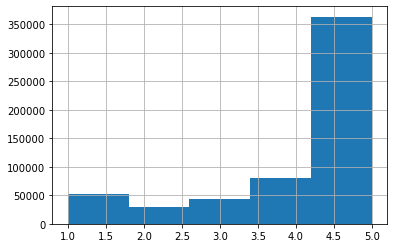

In [13]:
data['Score'].hist(bins=5)

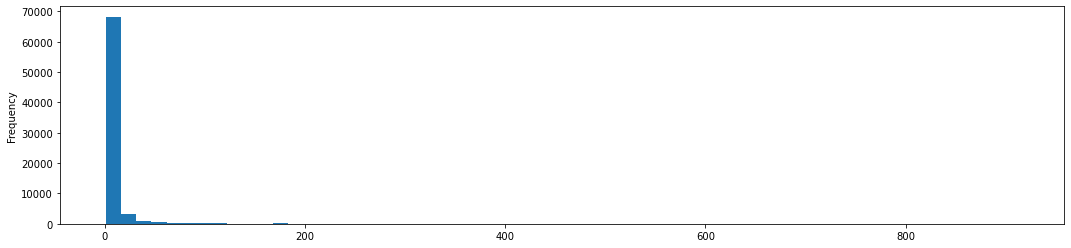

In [14]:
ratPprod = data.groupby(['ProductId']).Score.count()
ratPprod.plot.hist(bins=60, figsize=(18,4))

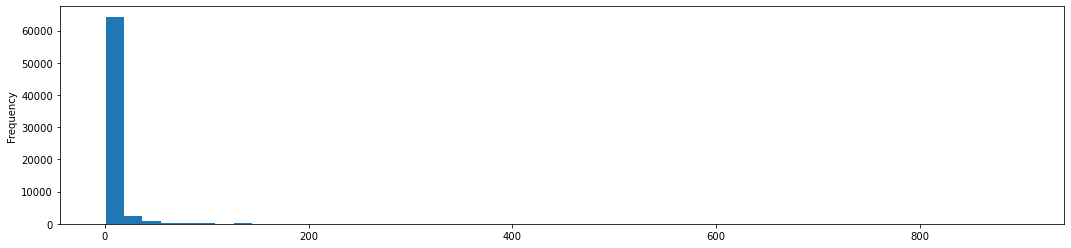

In [15]:
#distro of num of ratings with a score >2
ratPprod = data[data.Score > 2].groupby(['ProductId']).Score.count()
ratPprod.plot.hist(bins=50, figsize=(18,4))

In [16]:
len(data.ProductId.unique())

74258

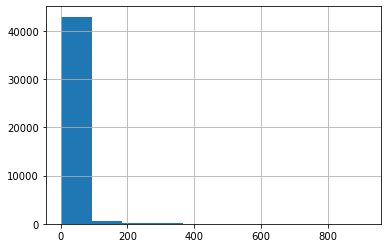

In [17]:
#distro of num of ratings per products, including products with at least 2 ratings
aux1 = data.groupby(['ProductId']).count()
aux1[aux1.UserId>1].UserId.hist()

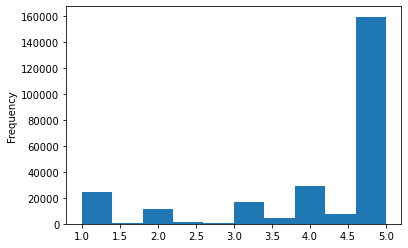

In [18]:
### distribution of average score per user
data.groupby('UserId').Score.mean().plot.hist()

### visual/analysis of data

In [18]:
data.groupby(data.Datetime.dt.month).count()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Datetime
Datetime,,,,,,,,,,
1,50367,50367,50367,50367,50367,50367,50367,50367,50367,50367
2,45356,45356,45356,45356,45356,45356,45356,45356,45356,45356
3,48367,48367,48367,48367,48367,48367,48367,48367,48367,48367
4,44473,44473,44473,44473,44473,44473,44473,44473,44473,44473
5,46226,46226,46226,46226,46226,46226,46226,46226,46226,46226
6,44479,44479,44479,44479,44479,44479,44479,44479,44479,44479
7,48419,48419,48419,48419,48419,48419,48419,48419,48419,48419
8,50526,50526,50526,50526,50526,50526,50526,50526,50526,50526
9,55740,55740,55740,55740,55740,55740,55740,55740,55740,55740


### Heatmap of scores vs month

In [19]:
dt=data.groupby([data.Datetime.dt.month,data.Score]).ProductId.count()

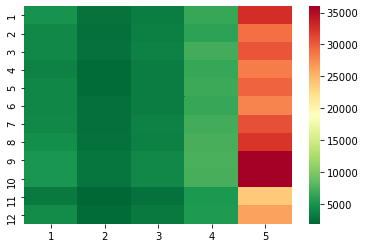

In [25]:
import seaborn as sns 

d={}
for month in range(1,13):
    d[month]=dt[month].tolist()
sns.heatmap(pd.DataFrame.from_dict(d,orient='index',columns=[1,2,3,4,5]), cmap='RdYlGn_r')

### heatmap of day of week vs month

In [21]:
hist_dayofweek_month = {}

for dayofweek in range(1,7):
    hist_dayofweek_month[dayofweek] = data[data.Datetime.dt.dayofweek == dayofweek].groupby

In [27]:
sns.heatmap(pd.DataFrame(hist_dayofweek_month, orient='index'),cmap='RdYlGn_r')

TypeError: __init__() got an unexpected keyword argument 'orient'

In [28]:
hist_dayofweek_month_mean = {}

for dayofweek in range(1,7):
    hist_dayofweek_month[dayofweek] = data[data.Datetime.dt.dayofweek == dayofweek].groupby

# look into the text

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
def clean_text(text):
    words = word_tokenize(text)
    good_words = []
    for word in words:
        if word.lower() not in stop_words and word.isalpha():
            good_words.append(word.lower())
            
    return good_words

In [18]:
wordlist = data['Text'].apply(lambda text:clean_text(text))

In [19]:
wordlist

Id
1       [bought, several, vitality, canned, dog, food,...
2       [product, arrived, labeled, jumbo, salted, pea...
3       [confection, around, centuries, light, pillowy...
4       [looking, secret, ingredient, robitussin, beli...
5       [great, taffy, great, price, wide, assortment,...
                              ...                        
996     [black, market, hot, sauce, wonderful, husband...
997     [man, say, salsa, bomb, different, kinds, almo...
998     [sauce, good, anything, like, adding, asian, f...
999     [hot, like, low, star, reviewer, got, suckered...
1000    [admit, sucker, large, quantity, oz, shopping,...
Name: Text, Length: 1000, dtype: object

In [40]:
import nltk
from textblob import TextBlob
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/lorenzo/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [116]:
#FUNZIONA
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(str(s))) 
  
def get_main_topic(text):
    
    blob = TextBlob(text)

    return [ word.lower() for (word,tag) in blob.tags if tag == "NNP" and tag != "VBZ" and tag != "DT" and tag != "JJ" and tag != "NN"]

data['Main topic'] = listToString(data['Text'].apply(get_main_topic))

In [118]:
data['Main topic']

Id
1       I d \n 1                                      ...
2       I d \n 1                                      ...
3       I d \n 1                                      ...
4       I d \n 1                                      ...
5       I d \n 1                                      ...
                              ...                        
996     I d \n 1                                      ...
997     I d \n 1                                      ...
998     I d \n 1                                      ...
999     I d \n 1                                      ...
1000    I d \n 1                                      ...
Name: Main topic, Length: 1000, dtype: object

In [20]:
data['text_words'] = wordlist

In [72]:
data['Main topic']

Id
1                                    [vitality, labrador]
2                [product, jumbo, salted, peanuts, jumbo]
3       [filberts, c.s, lewis, lion, witch, wardrobe, ...
4                       [robitussin, root, beer, extract]
5                                                 [great]
                              ...                        
996     [black, market, hot, sauce, is, wonderful, ......
997                                                    []
998                                                    []
999                                           ['habenero]
1000    [plastic, /, >, jalapenos, <, /, >, water, <, ...
Name: Main topic, Length: 1000, dtype: object

In [22]:
data['word_count'] = data.text_words.apply(lambda wordlist)

SyntaxError: invalid syntax (<ipython-input-22-1c08203d3cdb>, line 1)

### TFIDF score on the review texts

In [67]:
def word_count2(sent):
    word2cnt = dict()
    for word in sent.split():
        if word in word2cnt: word2cnt[word] += 1
        else: word2cnt[word] = 1
    
    return word2cnt

In [68]:
#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
#word_count_vector=cv.fit_transform(docs)


In [69]:
data['Word_Count'] = data['Text'].apply(word_count2)

In [30]:
data['Word_Count']

Id
1       {'I': 1, 'have': 2, 'bought': 1, 'several': 1,...
2       {'Product': 1, 'arrived': 1, 'labeled': 1, 'as...
3       {'This': 1, 'is': 5, 'a': 4, 'confection': 1, ...
4       {'If': 1, 'you': 1, 'are': 1, 'looking': 1, 'f...
5       {'Great': 1, 'taffy': 2, 'at': 1, 'a': 4, 'gre...
                              ...                        
996     {'BLACK': 1, 'MARKET': 1, 'HOT': 1, 'SAUCE': 1...
997     {'Man': 1, 'what': 1, 'can': 1, 'i': 5, 'say,'...
998     {'this': 1, 'sauce': 1, 'is': 1, 'so': 1, 'goo...
999     {'Not': 1, 'hot': 2, 'at': 1, 'all.': 1, 'Like...
1000    {'I': 4, 'have': 3, 'to': 1, 'admit,': 1, 'was...
Name: Word_Count, Length: 1000, dtype: object

In [87]:
v = TfidfVectorizer()

In [109]:
tfidf = data['Main topic'].apply(lambda text:v.fit_transform(text.split('\n')))

AttributeError: 'list' object has no attribute 'split'

In [104]:
data['TFIDF Values'] = tfidf
data

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Datetime,text_words,Word_Count,adjectives,Main topic,TFIDF Values
Id,,,,,,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,"[bought, several, vitality, canned, dog, food,...","{'I': 1, 'have': 2, 'bought': 1, 'several': 1,...","[several, good, processed, finicky]","[vitality, labrador]","(0, 20)\t0.1259881576697424\n (0, 34)\t0.12..."
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,"[product, arrived, labeled, jumbo, salted, pea...","{'Product': 1, 'arrived': 1, 'labeled': 1, 'as...","[small, unsalted, sure]","[product, jumbo, salted, peanuts, jumbo]","(0, 13)\t0.14433756729740646\n (0, 20)\t0.1..."
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,"[confection, around, centuries, light, pillowy...","{'This': 1, 'is': 5, 'a': 4, 'confection': 1, ...","[few, light, pillowy, tiny, powdered, tiny, ch...","[filberts, c.s, lewis, lion, witch, wardrobe, ...","(0, 50)\t0.07035975447302918\n (0, 41)\t0.0..."
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,"[looking, secret, ingredient, robitussin, beli...","{'If': 1, 'you': 1, 'are': 1, 'looking': 1, 'f...","[secret, good, cherry, medicinal]","[robitussin, root, beer, extract]","(0, 20)\t0.14907119849998599\n (0, 30)\t0.1..."
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,"[great, taffy, great, price, wide, assortment,...","{'Great': 1, 'taffy': 2, 'at': 1, 'a': 4, 'gre...","[great, wide, quick]",[great],"(0, 2)\t0.17407765595569785\n (0, 6)\t0.174..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,B006F2NYI2,A1D3F6UI1RTXO0,Swopes,1,1,5,1331856000,Hot & Flavorful,BLACK MARKET HOT SAUCE IS WONDERFUL.... My hus...,2012-03-16,"[black, market, hot, sauce, wonderful, husband...","{'BLACK': 1, 'MARKET': 1, 'HOT': 1, 'SAUCE': 1...","[flavorful, nice, yummy, meal., many, differen...","[black, market, hot, sauce, is, wonderful, ......","(0, 49)\t0.07761505257063328\n (0, 24)\t0.0..."
997,B006F2NYI2,AF50D40Y85TV3,Mike A.,1,1,5,1328140800,Great Hot Sauce and people who run it!,"Man what can i say, this salsa is the bomb!! i...",2012-02-02,"[man, say, salsa, bomb, different, kinds, almo...","{'Man': 1, 'what': 1, 'can': 1, 'i': 5, 'say,'...","[different, cool, free, i, first, dont, hot]",[],"(0, 38)\t0.11704114719613057\n (0, 22)\t0.1..."
998,B006F2NYI2,A3G313KLWDG3PW,kefka82,1,1,5,1324252800,this sauce is the shiznit,this sauce is so good with just about anything...,2011-12-19,"[sauce, good, anything, like, adding, asian, f...","{'this': 1, 'sauce': 1, 'is': 1, 'so': 1, 'goo...","[good, asian, good, strong, other, pineapple]",[],"(0, 26)\t0.11180339887498948\n (0, 37)\t0.1..."


In [ ]:
slice = data['text_words'].apply(lambda text:cv.transform(text))

In [46]:
data['text_words'].apply(lambda text:cv.fit(text))

ValueError: empty vocabulary; perhaps the documents only contain stop words

## Clustering

In [26]:
from sklearn.cluster import KMeans

In [27]:
#create our model
model = KMeans(verbose=True)

In [40]:
slice = data.iloc[:,3:7] #all rows, 3 to 6 columns

In [41]:
model.fit(slice)

Initialization complete
Iteration 0, inertia 4.14844481601016e+19
Iteration 1, inertia 3.9213100341709185e+19
Iteration 2, inertia 3.8672337626912465e+19
Iteration 3, inertia 3.815888282722454e+19
Iteration 4, inertia 3.767984739775985e+19
Iteration 5, inertia 3.7171065547840995e+19
Iteration 6, inertia 3.66446229647327e+19
Iteration 7, inertia 3.611052542533572e+19
Iteration 8, inertia 3.5697749226508677e+19
Iteration 9, inertia 3.532139502660647e+19
Iteration 10, inertia 3.4977505164414177e+19
Iteration 11, inertia 3.466877237383342e+19
Iteration 12, inertia 3.441231356825682e+19
Iteration 13, inertia 3.4212831164480045e+19
Iteration 14, inertia 3.404583017338724e+19
Iteration 15, inertia 3.3922356095719465e+19
Iteration 16, inertia 3.381452861542864e+19
Iteration 17, inertia 3.3713610219752915e+19
Iteration 18, inertia 3.3635661150989275e+19
Iteration 19, inertia 3.357719422670525e+19
Iteration 20, inertia 3.3532308572637643e+19
Iteration 21, inertia 3.3500359144787214e+19
Iteration

KMeans(verbose=True)

In [43]:
cluster_vals = model.predict(slice)
cluster_vals

array([0, 2, 1, ..., 4, 4, 2], dtype=int32)

In [45]:
slice['cluster'] = cluster_vals
slice

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,cluster
Id,,,,,
1,1,1,5,1303862400,0
2,0,0,1,1346976000,2
3,1,1,4,1219017600,1
4,3,3,2,1307923200,0
5,0,0,5,1350777600,2
...,...,...,...,...,...
568450,0,0,5,1299628800,0
568451,0,0,2,1331251200,4
568452,2,2,5,1329782400,4


In [46]:
data['cluster'] = cluster_vals

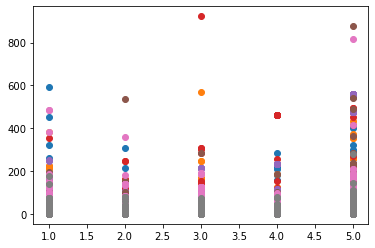

In [48]:
fig = plt.figure()
for cluster in range(0,10):
    plt.scatter(slice[slice.cluster == cluster].Score, slice[slice.cluster == cluster].HelpfulnessDenominator)
plt.show()

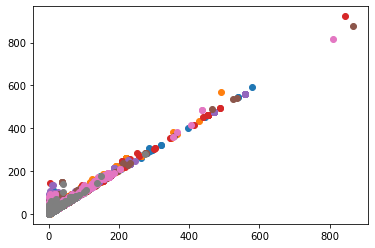

In [49]:
fig = plt.figure()
for cluster in range(0,10):
    plt.scatter(slice[slice.cluster == cluster].HelpfulnessNumerator, slice[slice.cluster == cluster].HelpfulnessDenominator)
plt.show()

In [50]:
# run KMeans for different sizes in order to to elbow method to find optimal num of clusters
from tqdm import tqdm

In [51]:
slice = data.iloc[:,3:6] #all rows, 3 to 6 columns

In [52]:
elbow = {}

for k in tqdm(range(3,20)):
    elbow_model=KMeans(n_clusters=k)
    elbow_model.fit_predict(slice)
    elbow[k]=elbow_model.inertia_

100%|██████████| 17/17 [02:38<00:00,  9.32s/it]


In [53]:
elbow

{3: 23508715.366719212,
 4: 15195555.342984809,
 5: 10405242.655452238,
 6: 7995430.481773518,
 7: 6543136.167429792,
 8: 5505913.601689081,
 9: 4764131.307699994,
 10: 4156671.532183134,
 11: 3611028.1522489507,
 12: 3277171.069232692,
 13: 2951366.815808028,
 14: 2747371.94384158,
 15: 2502913.894181376,
 16: 2315927.663981884,
 17: 2116434.401195977,
 18: 1952931.0251545573,
 19: 1788134.4777560374}

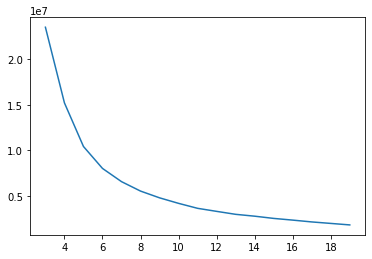

In [54]:
plt.plot(list(elbow.keys()), list(elbow.values())) #around 6 it could be OK

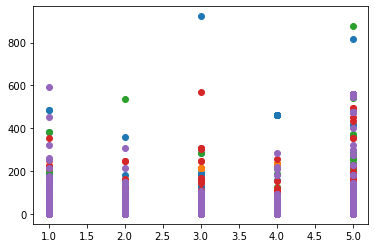

In [55]:
model = KMeans(n_clusters=5)
slice = data.iloc[:,3:7]
model.fit(slice)
cluster_values = model.predict(slice)
data['cluster'] = cluster_values

fig = plt.figure()
for cluster in range(0,10):
    plt.scatter(data[data.cluster == cluster].Score, data[data.cluster == cluster].HelpfulnessDenominator)
plt.show()

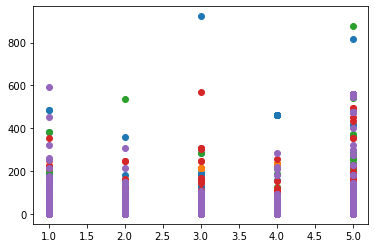

In [56]:
prod_per_cluster = {}
for cluster in range(0,10):
    plt.scatter(data[data.cluster == cluster].Score, data[data.cluster == cluster].HelpfulnessDenominator)
plt.show()

### adding data features

In [57]:
data['Month'] = data.Datetime.dt.month

In [58]:
data['DayOfWeek'] = data.Datetime.dt.dayofweek

In [61]:
slice = data[["HelpfulnessNumerator", "HelpfulnessDenominator", "Score", "Month", "text_words"]]

In [62]:
slice

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Month,text_words
Id,,,,,
1,1,1,5,4,"[bought, several, vitality, canned, dog, food,..."
2,0,0,1,9,"[product, arrived, labeled, jumbo, salted, pea..."
3,1,1,4,8,"[confection, around, centuries, light, pillowy..."
4,3,3,2,6,"[looking, secret, ingredient, robitussin, beli..."
5,0,0,5,10,"[great, taffy, great, price, wide, assortment,..."
...,...,...,...,...,...
568450,0,0,5,3,"[great, sesame, chicken, good, better, restura..."
568451,0,0,2,3,"[disappointed, flavor, chocolate, notes, espec..."
568452,2,2,5,2,"[stars, small, give, one, training, session, t..."


In [63]:
elbow = {}

for k in tqdm(range(3,20)):
    elbow_model=KMeans(n_clusters=k)
    elbow_model.fit_predict(slice)
    elbow[k]=elbow_model.inertia_

  0%|          | 0/17 [00:00<?, ?it/s]


ValueError: setting an array element with a sequence.

Text(10, 200000, 'Cluster Size')

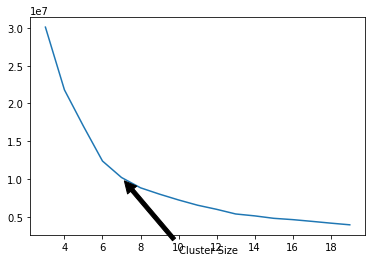

In [87]:
plt.plot(list(elbow.keys()), list(elbow.values())) #also 7 is ok now
plt.annotate('Cluster Size', xy=(7, elbow[7]),
            xytext=(10,200000),
            arrowprops = dict(facecolor='black',shrink=0.05))

In [88]:
model = KMeans(7)
cluster = model.fit_predict(slice)
data['cluster'] = cluster

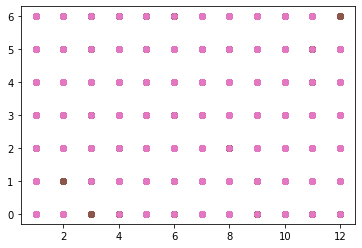

In [90]:
fig = plt.figure()
for cluster in range(0,7):
    plt.scatter(data[data.cluster == cluster].Month, data[data.cluster == cluster].DayOfWeek)
plt.show()

In [26]:
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,text_words
Id,,,,,,,,,,
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,"[great, taffy, great, price, wide, assortment,..."


In [7]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
texts = data['Text']

In [9]:
texts.head(20)

0     I have bought several of the Vitality canned d...
1     Product arrived labeled as Jumbo Salted Peanut...
2     This is a confection that has been around a fe...
3     If you are looking for the secret ingredient i...
4     Great taffy at a great price.  There was a wid...
5     I got a wild hair for taffy and ordered this f...
6     This saltwater taffy had great flavors and was...
7     This taffy is so good.  It is very soft and ch...
8     Right now I'm mostly just sprouting this so my...
9     This is a very healthy dog food. Good for thei...
10    I don't know if it's the cactus or the tequila...
11    One of my boys needed to lose some weight and ...
12    My cats have been happily eating Felidae Plati...
13    good flavor! these came securely packed... the...
14    The Strawberry Twizzlers are my guilty pleasur...
15    My daughter loves twizzlers and this shipment ...
16    I love eating them and they are good for watch...
17    I am very satisfied with my Twizzler purch

In [10]:
lemmatizer = WordNetLemmatizer()

In [11]:
stop_words = set(stopwords.words('english'))

In [12]:
def clean_text(text):
    words = word_tokenize(text)
    good_words = []
    for word in words:
        if word.lower() not in stop_words and word.isalpha():
            good_words.append(word.lower())
            
    return good_words

In [13]:
data.Text.iloc[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [14]:
X = np.array(data)
X

array([[1, 'B001E4KFG0', 'A3SGXH7AUHU8GW', ..., 1303862400,
        'Good Quality Dog Food',
        'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'],
       [2, 'B00813GRG4', 'A1D87F6ZCVE5NK', ..., 1346976000,
        'Not as Advertised',
        'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'],
       [3, 'B000LQOCH0', 'ABXLMWJIXXAIN', ..., 1219017600,
        '"Delight" says it all',
        'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful

In [15]:
clean_text(data.Text.iloc[0])

['bought',
 'several',
 'vitality',
 'canned',
 'dog',
 'food',
 'products',
 'found',
 'good',
 'quality',
 'product',
 'looks',
 'like',
 'stew',
 'processed',
 'meat',
 'smells',
 'better',
 'labrador',
 'finicky',
 'appreciates',
 'product',
 'better']

In [16]:
data['text_words'] = data.Text.apply(lambda x: clean_text(x))
data['text_words']

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, around, centuries, light, pillowy...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568449    [great, sesame, chicken, good, better, restura...
568450    [disappointed, flavor, chocolate, notes, espec...
568451    [stars, small, give, one, training, session, t...
568452    [best, treats, training, rewarding, dog, good,...
568453    [satisfied, product, advertised, use, cereal, ...
Name: text_words, Length: 568454, dtype: object

In [17]:
flat_words = []
for single_row in data.text_words:
    for word in single_row:
        flat_words.append(word)

In [20]:
text = data.Text[5000]

In [21]:
svd.transform(text)

ValueError: Expected 2D array, got scalar array instead:
array=I thought I'd try the multi-pack to see which flavor I liked the best, but I like them all. They are healthy, fulfilling, and all good ingredients I can actually pronounce. These are the smaller packs, and now I can proceed to ordering the larger bags. Love these cookies!.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [19]:
svd = TruncatedSVD(n_components=100)

In [ ]:
svd.fit()

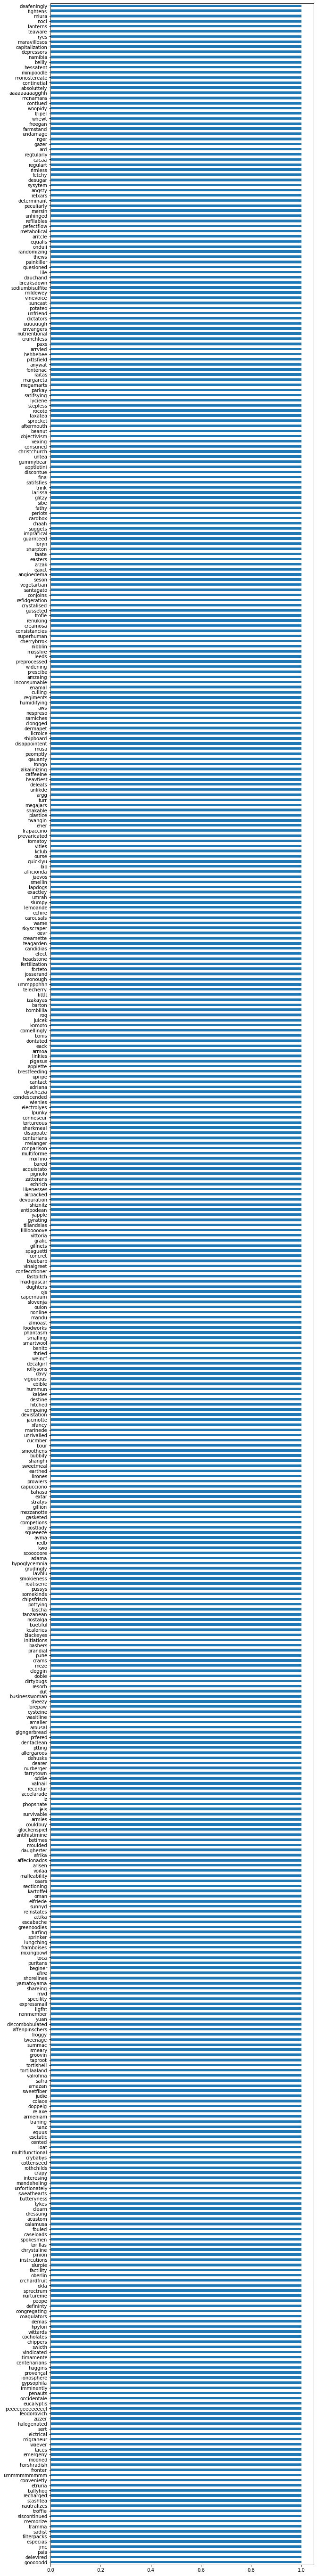

In [18]:
pd.Series(flat_words).value_counts().sort_values(ascending = False).tail(500).plot.barh(figsize=(10,100))

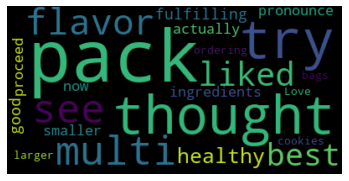

In [30]:
#Try using wordcloud

# Start with one review:
text = data.Text[5000]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [2]:
svd = TruncatedSVD(n_components=100)

In [3]:
svd.fit(text)

NameError: name 'text' is not defined

### K-means algorithm implementation into a function

In [20]:
k = 3 # number of clusters
max_iteration = 2    

In [21]:
def Distance2Point(point1, point2):
    dis = sum((point1 - point2)**2)**0.5
    return dis

In [24]:
def KMean(data):

    centroids = {}

    for i in range(k):
        centroids[i] = data[i]

    classes = {}
    for iteration in range(max_iteration):
        classes = {}
    for classKey in range(k):
        classes[classKey] = []

      
    for dataPoint in data: 
        Distance = []
        for centroid in centroids:
            dis = Distance2Point(dataPoint, centroids[centroid])
            Distance.append(dis)

          
        minDis = min(Distance)
            
        minDisIndex = Distance.index(minDis)
        classes[minDisIndex].append(dataPoint)
           
     
    oldCentroid = dict(centroids)
        
    for classKey in classes:
        classData = classes[classKey]
        NewCentroid = np.mean(classData, axis = 0)
        centroids[classKey] = NewCentroid
        
        isFine = True

        for centroid in oldCentroid:
            oldCent = oldCentroid[centroid]
            curr = centroids[centroid]
            
        if np.sum((curr - oldCent)/oldCent * 100) > 0.001:
                isFine = False

        if isFine:
            break
  
    return centroids, classes

In [26]:
KMean(data)

KeyError: 0